In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [77]:
data = pd.read_csv('data/train.csv')
print(data.shape)
data.head()

(12701, 12)


,Open_time,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
0,2021-05-13 09:00:00,1.6625,1.6800,1.6623,1.6737,2878032.99,4.821304e+06,5125,1702161.28,2.851617e+06,0.673684,0
1,2021-05-13 09:05:00,1.6738,1.6790,1.6686,1.6733,2723854.15,4.558141e+06,4318,1516726.12,2.538139e+06,-0.029872,0
2,2021-05-13 09:10:00,1.6734,1.6749,1.6496,1.6514,3653708.06,6.075417e+06,5561,1625405.03,2.702822e+06,-1.314689,1
3,2021-05-13 09:15:00,1.6515,1.6708,1.6500,1.6693,3313388.75,5.505110e+06,5374,1797877.23,2.987432e+06,1.077808,0
4,2021-05-13 09:20:00,1.6690,1.6728,1.6587,1.6668,3478711.17,5.794350e+06,5799,1736515.81,2.892649e+06,-0.131815,0


In [78]:
data['Open_time'] = data['Open_time'].apply(pd.to_datetime)
data = data.set_index('Open_time')
data.index = data.index.to_period(freq='min')
data.head()

,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
Open_time,,,,,,,,,,,
2021-05-13 09:00,1.6625,1.6800,1.6623,1.6737,2878032.99,4.821304e+06,5125,1702161.28,2.851617e+06,0.673684,0
2021-05-13 09:05,1.6738,1.6790,1.6686,1.6733,2723854.15,4.558141e+06,4318,1516726.12,2.538139e+06,-0.029872,0
2021-05-13 09:10,1.6734,1.6749,1.6496,1.6514,3653708.06,6.075417e+06,5561,1625405.03,2.702822e+06,-1.314689,1
2021-05-13 09:15,1.6515,1.6708,1.6500,1.6693,3313388.75,5.505110e+06,5374,1797877.23,2.987432e+06,1.077808,0
2021-05-13 09:20,1.6690,1.6728,1.6587,1.6668,3478711.17,5.794350e+06,5799,1736515.81,2.892649e+06,-0.131815,0


## Scale 

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_values = scaler.fit_transform(data.drop(columns='target'))

In [82]:
data_scaled = pd.DataFrame(scaled_values, columns=data.columns.drop('target') , index=data.index)
data_scaled['target'] = data['target'].values
data_scaled.head()

,Open,High,Low,Close,Volume,QV,NOT,TBB,TBQ,Volatility,target
Open_time,,,,,,,,,,,
2021-05-13 09:00,0.243189,0.285555,0.271220,0.288679,0.234669,0.249935,0.075714,0.449683,0.453986,0.847823,0
2021-05-13 09:05,0.288975,0.281520,0.296864,0.287058,0.172345,0.187337,-0.104384,0.300821,0.307768,-0.038690,0
2021-05-13 09:10,0.287354,0.264976,0.219525,0.198330,0.548218,0.548247,0.173016,0.388065,0.384582,-1.657616,1
2021-05-13 09:15,0.198618,0.248432,0.221153,0.270852,0.410651,0.412590,0.131283,0.526521,0.517335,1.357037,0
2021-05-13 09:20,0.269526,0.256503,0.256566,0.260723,0.477479,0.481391,0.226130,0.477262,0.473125,-0.167143,0


## Try feature tools

In [83]:
import featuretools as ft

\*\***Copied!!**\*\*

Feature tools operates on an idea known as Deep Feature Synthesis. The concept of Deep Feature Synthesis is to use basic building blocks known as feature primitives that can be stacked on top of each other to form new features. The depth of a "deep feature" is equal to the number of stacked primitives.

The first part of Feature Tools to understand is an entity. This is simply a table, or in pandas, a DataFrame. We corral multiple entities into a single object called an EntitySet. This is just a large data structure composed of many individual entities and the relationships between them.


In [93]:
es = ft.EntitySet(id = 'cardano')

In [95]:
es = es.entity_from_dataframe(entity_id = 'transactions', dataframe = data_scaled,
                              variable_types = {'target': ft.variable_types.Categorical}, 
                              index='Open_time')

In [96]:
es.entities

[Entity: transactions
   Variables:
     Open_time (dtype: index)
     Open (dtype: numeric)
     High (dtype: numeric)
     Low (dtype: numeric)
     Close (dtype: numeric)
     Volume (dtype: numeric)
     QV (dtype: numeric)
     NOT (dtype: numeric)
     TBB (dtype: numeric)
     TBQ (dtype: numeric)
     Volatility (dtype: numeric)
     target (dtype: categorical)
   Shape:
     (Rows: 12701, Columns: 12)]

## Separate into train and test

In [105]:
X = data.drop(columns='target')
y = data['target']

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Just run a model

In [139]:
# first, logistic regression
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression(multi_class='ovr', solver='liblinear', class_weight='balanced', random_state=42)
model_logistic.fit(X_train,y_train)
y_pred_logistic = model_logistic.predict(X_test)
y_pred_logistic

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_logistic)

0.7791030534351145

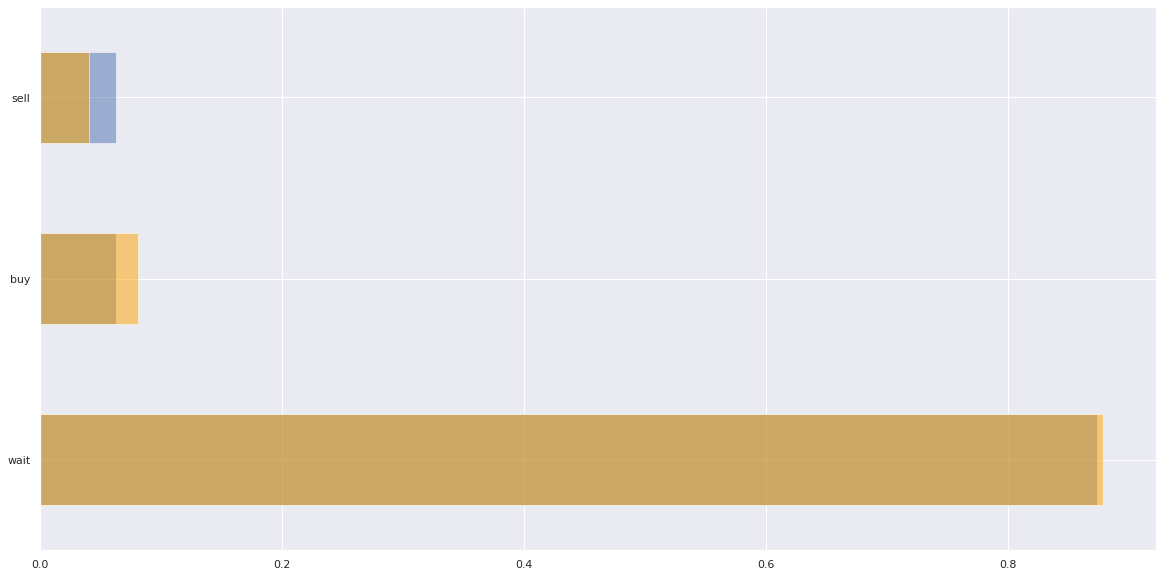

In [141]:
fig, ax = plt.subplots(figsize=(20,10))
data['target'].value_counts(normalize=True).plot(kind = 'barh', alpha=0.5, ax=ax, label='true', color='b')
pd.Series(y_pred_logistic).value_counts(normalize=True).plot(kind = 'barh', alpha=0.5, ax=ax, label='pred', color='orange')
plt.yticks(ticks=[0, 1, 2], labels=['wait', 'buy', 'sell']);